In [28]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits_data = digits.data
digits.feature_names
digits.target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
df_digit = pd.DataFrame(digits_data , columns=digits.feature_names)
df_digit['Target']= digits.target
df_digit.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
df_digit.shape

(1797, 65)

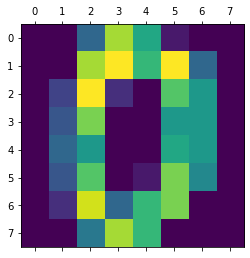

In [13]:
plt.matshow(digits.images[0])

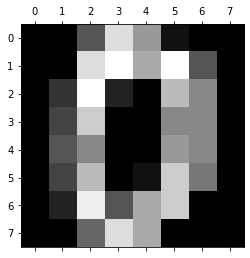

In [14]:
plt.matshow(digits.images[0])
plt.gray()

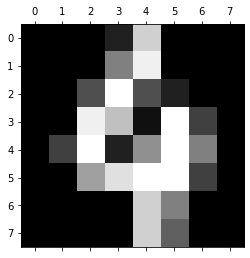

In [16]:
plt.matshow(digits.images[100])
plt.gray()

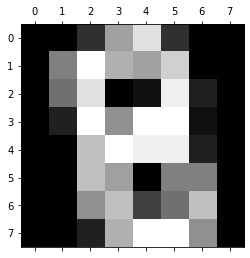

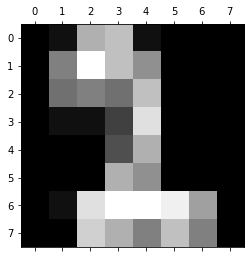

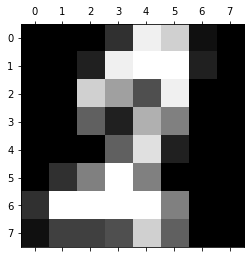

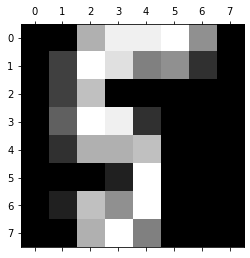

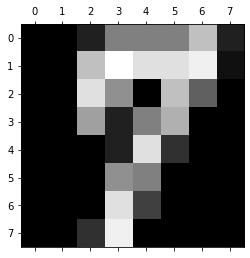

In [18]:
for i in range(500,505):
    plt.matshow(digits.images[i])
    plt.gray()

In [22]:
x = df_digit.drop('Target',axis =1)
y = df_digit['Target']

In [23]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2 , random_state = 10)

In [24]:
lr_clf = LogisticRegression(multi_class='ovr')
lr_clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [29]:
# Accuracy on Testing Data

y_pred = lr_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n',cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print('Multilabel Matrix is:\n',multi_cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification Report is :\n',clf_report)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is :\n',accuracy)

Confusion Matrix is:
 [[36  0  0  0  0  0  0  0  1  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 0  2  0  0 31  0  0  0  1  0]
 [ 0  1  0  0  0 31  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  1  0  0  0  0  0 30  0]
 [ 1  0  0  0  0  1  0  0  2 35]]
Multilabel Matrix is:
 [[[322   1]
  [  1  36]]

 [[320   6]
  [  1  33]]

 [[324   2]
  [  0  34]]

 [[320   0]
  [  1  39]]

 [[326   0]
  [  3  31]]

 [[327   1]
  [  1  31]]

 [[323   0]
  [  1  36]]

 [[320   0]
  [  0  40]]

 [[322   5]
  [  3  30]]

 [[321   0]
  [  4  35]]]
Classification Report is :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.85      0.97      0.90        34
           2       0.94      1.00      0.97        34
           3       1.00      0.97      0.99        40
           4       1.00      0.91      0.95        34
           

In [30]:
# Accuracy on Training Data

y_pred_train = lr_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix is:\n',cnf_matrix)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print('Multilabel Matrix is:\n',multi_cnf_matrix)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report is :\n',clf_report)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy is :\n',accuracy)

Confusion Matrix is:
 [[141   0   0   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0   2   0]
 [  0   0 143   0   0   0   0   0   0   0]
 [  0   0   0 143   0   0   0   0   0   0]
 [  0   0   0   0 147   0   0   0   0   0]
 [  0   0   0   0   0 150   0   0   0   0]
 [  0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   4   0   1   0   0   0   0 136   0]
 [  0   0   0   1   0   0   0   0   0 140]]
Multilabel Matrix is:
 [[[1296    0]
  [   0  141]]

 [[1285    4]
  [   2  146]]

 [[1294    0]
  [   0  143]]

 [[1292    2]
  [   0  143]]

 [[1290    0]
  [   0  147]]

 [[1287    0]
  [   0  150]]

 [[1293    0]
  [   0  144]]

 [[1298    0]
  [   0  139]]

 [[1294    2]
  [   5  136]]

 [[1296    0]
  [   1  140]]]
Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       0.97      0.99      0.98       148
           2       1.00      1.00

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
list1 = list(range(0,20))
list1


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [33]:
lr_model = LogisticRegression()
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],'multi_class' : ['auto', 'ovr', 'multinomial'],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'random_state':list1}
gscv_model = GridSearchCV(lr_model, param_grid, cv=5)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

LogisticRegression(penalty='l1', random_state=4, solver='saga')

In [34]:
gscv_model.best_params_

{'multi_class': 'auto', 'penalty': 'l1', 'random_state': 4, 'solver': 'saga'}

In [35]:
# Accuracy on Testing dataset

y_pred = gscv_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is :\n',cnf_matrix)

clf_report = classification_report(y_test, y_pred)
print('Classification Report is :\n',clf_report)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print('Multilabel Confusion Matrix is :\n',multilabel_cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy is :\n',accuracy)

Confusion Matrix is :
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 30  2  0  1  0  0  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  1  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  2  0]
 [ 0  1  0  0  0 31  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  1  1  0  0 38  0  0]
 [ 0  1  1  0  0  0  1  0 30  0]
 [ 0  0  0  0  0  1  0  0  2 36]]
Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.88      0.90        34
           2       0.89      1.00      0.94        34
           3       0.97      0.95      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.97      0.95        32
           6       0.97      0.97      0.97        37
           7       1.00      0.95      0.97        40
           8       0.86      0.91      0.88        33
           9       1.00      0.92      0.96        39

    accuracy          